### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("globalConfirmedCases.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, 
          inplace=True
         )

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 9,111720,3879,62393
Mar 10,115113,4063,64384
Mar 11,121312,4363,66519
Mar 12,126726,4629,67995
Mar 13,138164,5103,70494


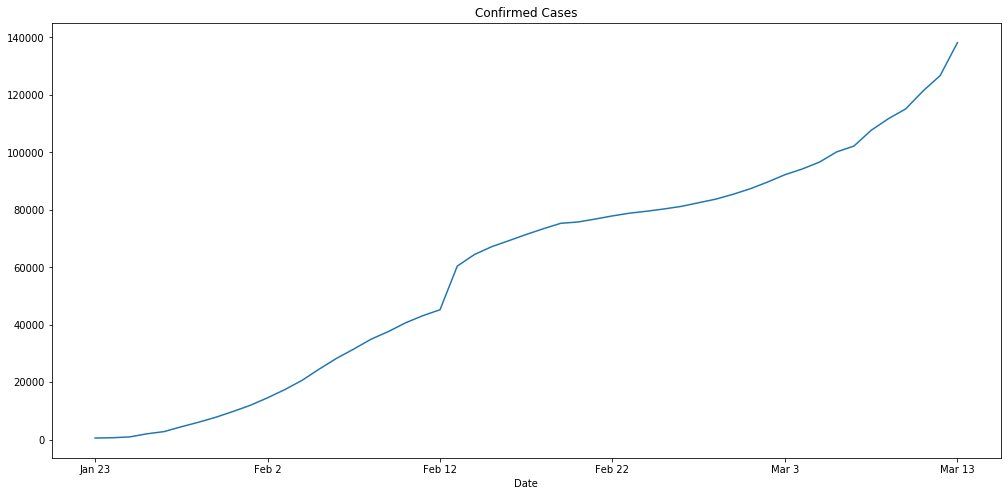

In [7]:
df.TotalConfirmedCases.plot(title="Confirmed Cases", figsize=(17, 8))

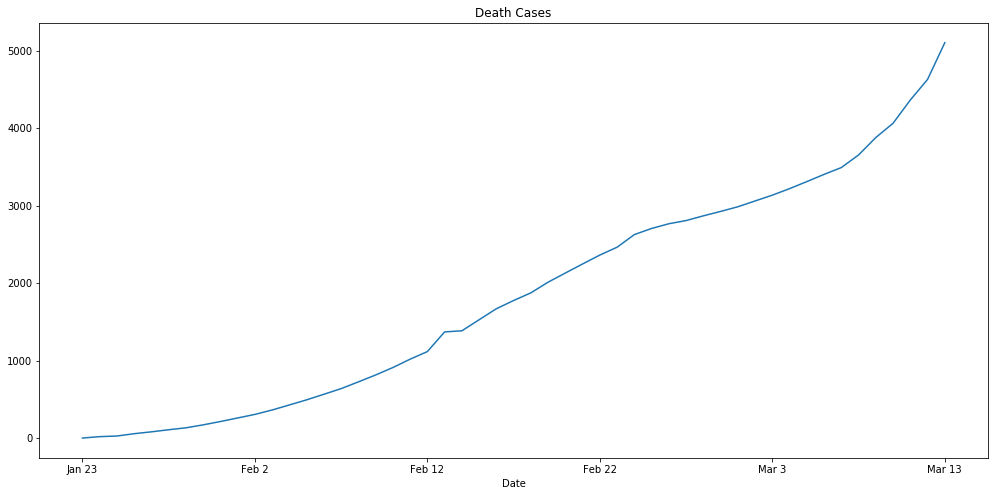

In [8]:
df.TotalDeaths.plot(title="Death Cases", figsize=(17, 8))

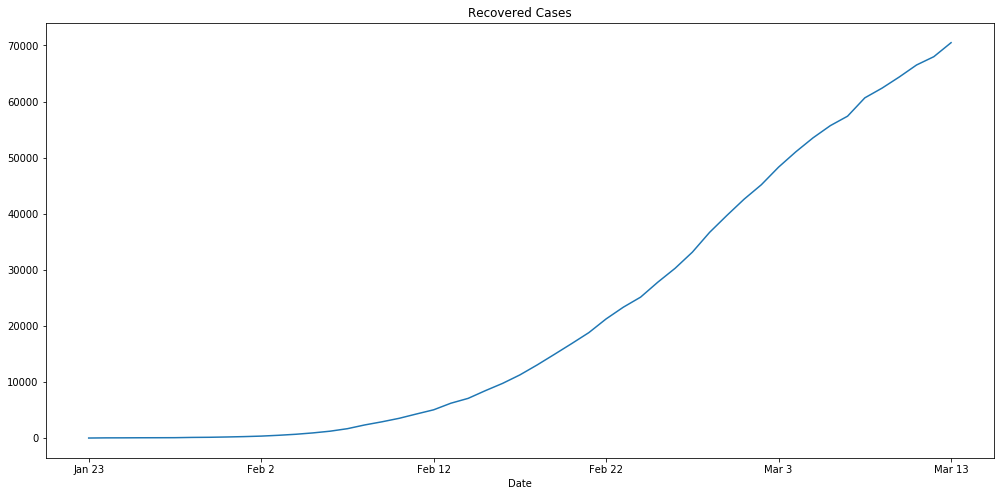

In [9]:
df.TotalRecovered.plot(title="Recovered Cases", figsize=(17, 8))

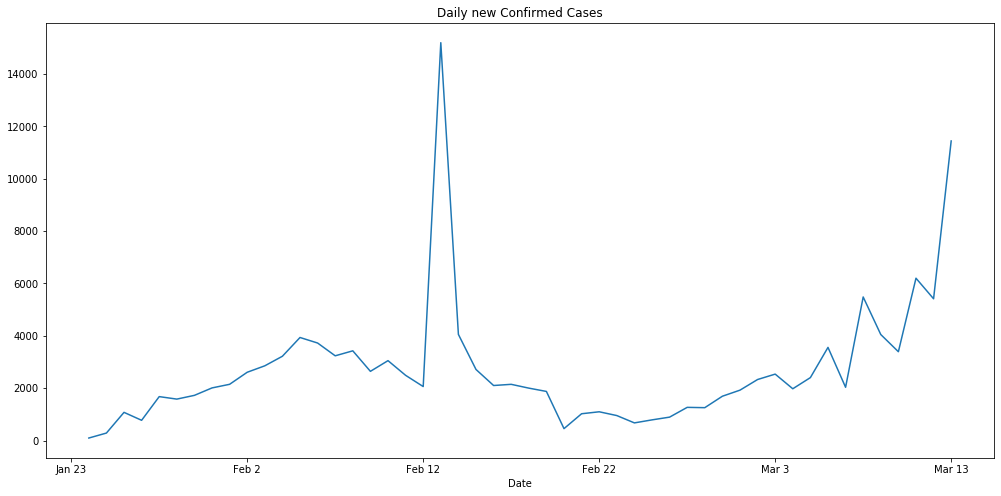

In [10]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily new Confirmed Cases", figsize=(17, 8))

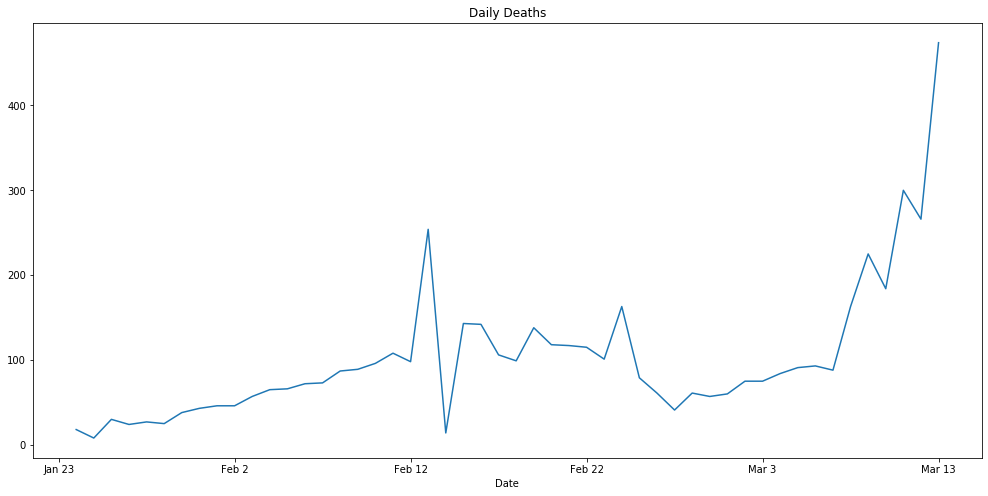

In [11]:
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(title="Daily Deaths", figsize=(17, 8))

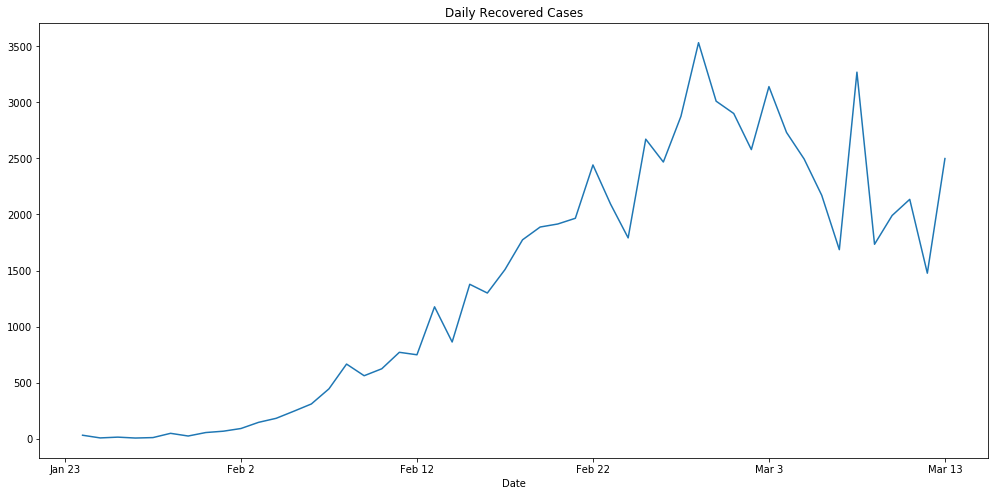

In [12]:
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(title="Daily Recovered Cases", figsize=(17, 8))

### Constants for predictions

In [13]:
predicted_days = 15
firstPredictionDay = datetime.datetime(2020,3,14)

### Arima for confirmed cases

In [14]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=930.238, BIC=934.062, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0); AIC=925.740, BIC=931.476, Fit time=0.447 seconds
Fit ARIMA: order=(0, 1, 1); AIC=927.984, BIC=933.720, Fit time=0.375 seconds
Fit ARIMA: order=(2, 1, 0); AIC=925.355, BIC=933.003, Fit time=0.662 seconds
Fit ARIMA: order=(2, 1, 1); AIC=926.621, BIC=936.181, Fit time=0.948 seconds
Fit ARIMA: order=(3, 1, 1); AIC=928.608, BIC=940.080, Fit time=1.320 seconds
Fit ARIMA: order=(3, 1, 0); AIC=926.784, BIC=936.344, Fit time=1.022 seconds
Total fit time: 5.372 seconds


In [15]:
confirmed_model.aic()

925.3550399984729

In [16]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [17]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [18]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-14 - 144453
2020-03-15 - 150540
2020-03-16 - 155305
2020-03-17 - 159591
2020-03-18 - 163398
2020-03-19 - 166934
2020-03-20 - 170263
2020-03-21 - 173460
2020-03-22 - 176563
2020-03-23 - 179604
2020-03-24 - 182601
2020-03-25 - 185569
2020-03-26 - 188517
2020-03-27 - 191451
2020-03-28 - 194375


### Arima for death cases

In [19]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=525.621, BIC=536.972, Fit time=1.906 seconds
Fit ARIMA: order=(0, 2, 0); AIC=545.512, BIC=549.296, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0); AIC=528.104, BIC=533.780, Fit time=0.137 seconds
Fit ARIMA: order=(0, 2, 1); AIC=534.440, BIC=540.116, Fit time=0.160 seconds
Fit ARIMA: order=(1, 2, 2); AIC=524.775, BIC=534.234, Fit time=0.602 seconds
Fit ARIMA: order=(1, 2, 1); AIC=529.931, BIC=537.498, Fit time=0.315 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=524.403, BIC=531.970, Fit time=0.266 seconds
Fit ARIMA: order=(0, 2, 3); AIC=525.726, BIC=535.185, Fit time=0.466 seconds
Total fit time: 4.380 seconds


In [20]:
deaths_model.aic()

524.4027784173662

In [21]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [22]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [23]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-03-14 - 5442
2020-03-15 - 5886
2020-03-16 - 6338
2020-03-17 - 6799
2020-03-18 - 7268
2020-03-19 - 7745
2020-03-20 - 8231
2020-03-21 - 8725
2020-03-22 - 9228
2020-03-23 - 9739
2020-03-24 - 10258
2020-03-25 - 10786
2020-03-26 - 11322
2020-03-27 - 11867
2020-03-28 - 12420


### Arima for recovered cases

In [24]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=729.721, BIC=741.072, Fit time=1.080 seconds
Fit ARIMA: order=(0, 2, 0); AIC=743.303, BIC=747.086, Fit time=0.016 seconds
Fit ARIMA: order=(1, 2, 0); AIC=728.647, BIC=734.322, Fit time=0.280 seconds
Fit ARIMA: order=(0, 2, 1); AIC=728.868, BIC=734.543, Fit time=0.282 seconds
Fit ARIMA: order=(2, 2, 0); AIC=726.532, BIC=734.099, Fit time=0.388 seconds
Fit ARIMA: order=(2, 2, 1); AIC=720.963, BIC=730.422, Fit time=0.751 seconds
Fit ARIMA: order=(3, 2, 2); AIC=724.650, BIC=737.893, Fit time=1.305 seconds
Fit ARIMA: order=(1, 2, 1); AIC=728.184, BIC=735.752, Fit time=0.552 seconds
Fit ARIMA: order=(3, 2, 1); AIC=729.301, BIC=740.652, Fit time=0.984 seconds
Total fit time: 5.664 seconds


In [25]:
recovered_model.aic()

720.9633734106194

In [26]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [27]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [28]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-03-14 - 72270
2020-03-15 - 74489
2020-03-16 - 76710
2020-03-17 - 78753
2020-03-18 - 81172
2020-03-19 - 83312
2020-03-20 - 85715
2020-03-21 - 88068
2020-03-22 - 90439
2020-03-23 - 92947
2020-03-24 - 95378
2020-03-25 - 97952
2020-03-26 - 100506
2020-03-27 - 103117
2020-03-28 - 105789
